Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
600/600 [==============================] - 5s 7ms/step - loss: 0.8447 - accuracy: 0.8191 - val_loss: 0.4170 - val_accuracy: 0.9053
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.3528 - accuracy: 0.9104 - val_loss: 0.2939 - val_accuracy: 0.9196
Epoch 3/20
600/600 [==========

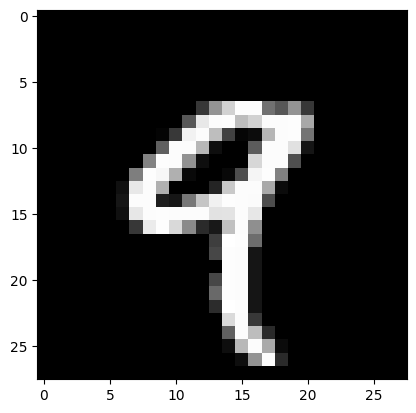

In [6]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[4], cmap='gray')

# Convert from integer to floats
x_train = np.float32(x_train)
x_test = np.float32(x_test)


# Normalize input values within interval [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert data to
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# We have 10 classes (0-9)
n_classes = y_train.shape[1]

# Define the model
model = Sequential()

# Add a flatten later
model.add(Flatten())

# Add a dense layer with 32 neurons and sigmoig activasion
model.add(Dense(32, activation="sigmoid"))

# Add a dense layer with n_classes neurons and softmax activasion
model.add(Dense(n_classes, activation="softmax"))

# Build the model
model.build(input_shape=(None, 28, 28))

# Summary of the model
model.summary()

# Train for 50 epoch with a learning rate of 0.01
epochs = 20

# Defines how many samples we should batch into one calculation of the gradient
batch_size = 100
lrate = 0.01

# Decay is defined as the rate at whiche the learning rate will decrease
decay = lrate / epochs

# Create an SGD optimizer with the given parameters and compile the model
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)

# Compile the model with either "adam" or "sgd" optimizer
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Fit the model
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
)

313/313 [==============================] - 1s 3ms/step
Prediction:  9
Acutal value:  9


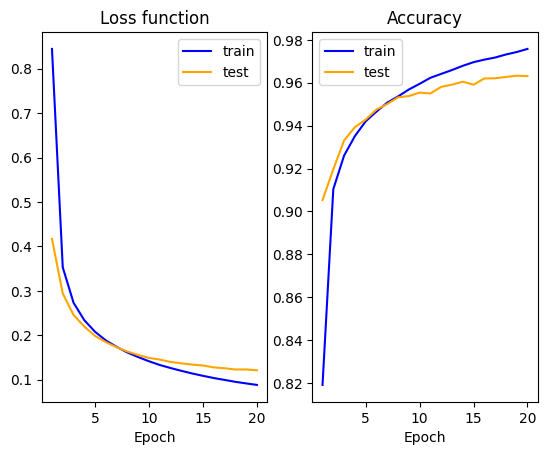

In [10]:
# Get the model predictions
prediction = model.predict(x_test)

# Prediction for item 12
guess = np.argmax(prediction[12])

# Actual value for item 12
value = np.argmax(y_test[12])

print("Prediction: ", guess)
print("Acutal value: ", value)

def summarize_diagnostics(history, epochs):
    e = range(1, epochs+1)
    plt.subplot(121)
    plt.plot(e, history.history['loss'], color='blue', label='train')
    plt.plot(e, history.history['val_loss'], color='orange', label='test')
    plt.title('Loss function')
    plt.xlabel('Epoch')
    plt.legend()
    plt.subplot(122)
    plt.plot(e, history.history['accuracy'], color='blue', label='train')
    plt.plot(e, history.history['val_accuracy'], color='orange', label='test')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

summarize_diagnostics(history, epochs)